In [2]:
from dlsite_analyzer.config import RAW_JSON_DATA_DIR
from dlsite_analyzer import (
    initialize_database,
    fetch_and_save_voice_works,
    import_voice_works_to_db,
)

In [3]:
# データベースにテーブルが存在しない場合は初期化する
initialize_database()

2024-11-10 03:26:57 INFO     dlsite_analyzer Database initialized successfully.


In [ ]:
# ボイス作品のデータをJSONファイルに保存
fetch_and_save_voice_works(RAW_JSON_DATA_DIR)

2024-11-08 19:00:31 INFO     dlsite_analyzer Total pages to process: 545
100%|██████████| 545/545 [43:58<00:00,  4.84s/it]
2024-11-08 19:44:30 INFO     dlsite_analyzer Finished saving voice works to JSON files.


In [4]:
# JSONファイルからデータベースにデータをインポート
import_voice_works_to_db(RAW_JSON_DATA_DIR)

Importing JSON to DB: 100%|██████████| 545/545 [00:01<00:00, 291.36it/s]
2024-11-10 03:27:01 INFO     dlsite_analyzer All JSON data imported to the database.


In [ ]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from itertools import chain
from pathlib import Path

from dlsite_analyzer.config import DATABASE_PATH
from dlsite_analyzer import (
    extract_words,
    generate_wordcloud,
    plot_wordcloud
)
from dlsite_analyzer.database import (
    DatabaseManager,
    VoiceWorksTableManager
)
wordcloud_folder = Path('./data/wordcloud')

In [2]:
with DatabaseManager(DATABASE_PATH) as db:
    voice_works = VoiceWorksTableManager(db)
    df = voice_works.get_all_voice_works()

In [3]:
# 単語の抽出
stop_words = []
documents1 = extract_words(list(df["title"]), stop_words=stop_words)
documents2 = extract_words(list(df["title"]), stop_words=stop_words)

100%|██████████| 54423/54423 [00:02<00:00, 23201.80it/s]


In [ ]:
# 単語のリストを作成
words = list(chain.from_iterable(documents1))

In [ ]:
# 単語の出現回数をカウント
word_count = pd.Series(words).value_counts()

In [ ]:
# ワードクラウドの作成
wc = generate_wordcloud(word_count, font_path=str(wordcloud_folder / 'ipaexg.ttf'))

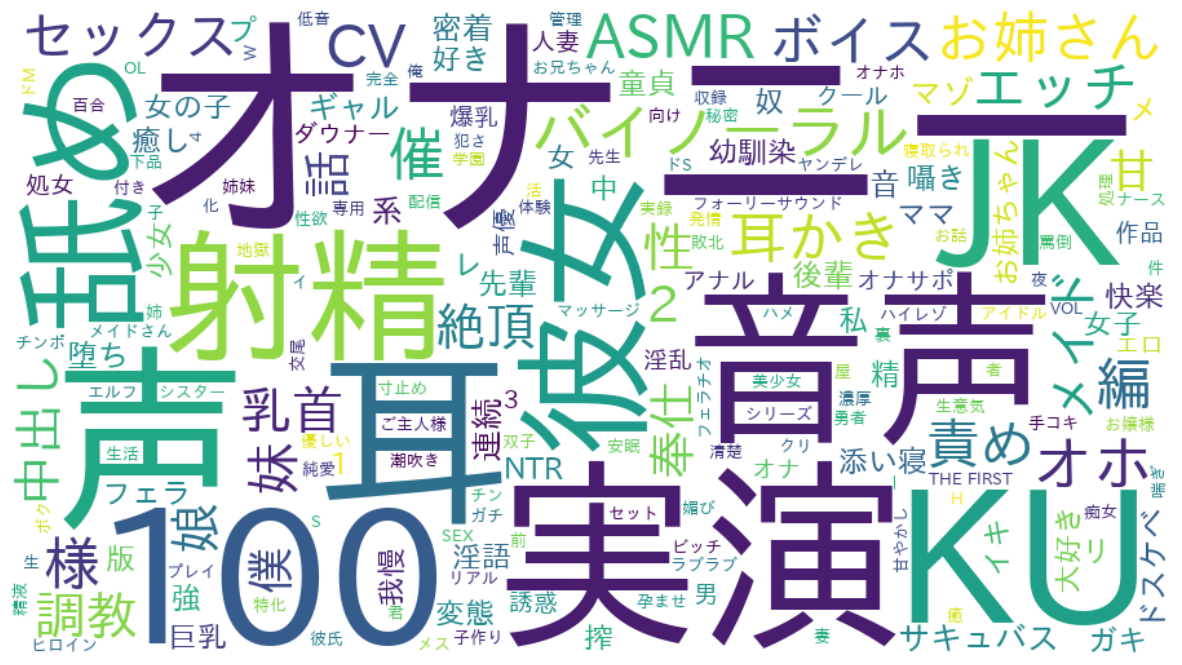

In [12]:
# ワードクラウドの表示
plot_wordcloud(wc, figsize=(15, 12), filename=wordcloud_folder / "wordcloud.png")